In [32]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [33]:
D_clients = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_clients.csv')

print(D_clients.shape)
D_clients.head(5)

(16000, 14)


,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0


In [34]:
# убираем лишние столбцы
D_clients.drop(columns=['REG_ADDRESS_PROVINCE',	'FACT_ADDRESS_PROVINCE',	'POSTAL_ADDRESS_PROVINCE'], axis=1, inplace=True)
D_clients = D_clients.drop_duplicates(keep='first')
print(D_clients.shape)

(16000, 11)


In [35]:
D_clients['EDUCATION'].unique()
D_clients['MARITAL_STATUS'].unique()

array(['Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова',
       'Гражданский брак', 'Разведен(а)'], dtype=object)

In [36]:
D_target = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_target.csv')
print(D_target.shape)
D_target.head()

(15223, 3)


,AGREEMENT_RK,ID_CLIENT,TARGET
0,59910150,106804370,0
1,59910230,106804371,0
2,59910525,106804372,0
3,59910803,106804373,0
4,59911781,106804374,0


In [37]:
data = D_clients.merge(D_target, left_on='ID', right_on='ID_CLIENT', how='right')
print(data.shape)
data.head()

(15223, 14)


,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,AGREEMENT_RK,ID_CLIENT,TARGET
0,106804370,49,1,Среднее специальное,Состою в браке,2,1,1,0,0,0,59910150,106804370,0
1,106804371,32,1,Среднее,Состою в браке,3,3,1,0,0,0,59910230,106804371,0
2,106804372,52,1,Неполное среднее,Состою в браке,4,0,1,0,0,0,59910525,106804372,0
3,106804373,39,1,Высшее,Состою в браке,1,1,1,0,1,0,59910803,106804373,0
4,106804374,30,0,Среднее,Состою в браке,0,0,1,0,0,0,59911781,106804374,0


In [38]:
data.drop(['ID'], axis=1, inplace=True)
print(data.shape)

(15223, 13)


In [39]:
D_close_loan = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_close_loan.csv')
print(D_close_loan.shape)
D_close_loan.head()

(21126, 2)


,ID_LOAN,CLOSED_FL
0,1753790658,1
1,1753790659,1
2,1753790660,1
3,1753790661,0
4,1753790662,1


In [40]:
D_loan = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_loan.csv')
print(D_loan.shape)
D_loan.head()

(21126, 2)


,ID_LOAN,ID_CLIENT
0,1753790658,106804370
1,1753790659,106804371
2,1753790660,106804372
3,1753790661,106804372
4,1753790662,106804373


In [41]:
D_loan = D_loan.merge(D_close_loan, on='ID_LOAN')
print(D_loan.shape)

(21126, 3)


In [42]:
# суммируем закрытые ссуды и считаем общее количество

D_loan = D_loan.groupby('ID_CLIENT').agg({'ID_LOAN': 'count', 'CLOSED_FL': 'sum'})
D_loan = D_loan.rename(columns={'ID_LOAN': 'LOAN_NUM_TOTAL', 'CLOSED_FL': 'LOAN_NUM_CLOSED'}).reset_index()
print(D_loan.shape)
D_loan.head(10)

(15223, 3)


,ID_CLIENT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,106804370,1,1
1,106804371,1,1
2,106804372,2,1
3,106804373,1,1
4,106804374,2,1
5,106804375,2,1
6,106804376,2,2
7,106804377,2,1
8,106804378,1,1
9,106804379,1,1


In [43]:
data = data.merge(D_loan, on='ID_CLIENT', how='left')
print(data.shape)
data.head(10)

(15223, 15)


,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,AGREEMENT_RK,ID_CLIENT,TARGET,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,49,1,Среднее специальное,Состою в браке,2,1,1,0,0,0,59910150,106804370,0,1,1
1,32,1,Среднее,Состою в браке,3,3,1,0,0,0,59910230,106804371,0,1,1
2,52,1,Неполное среднее,Состою в браке,4,0,1,0,0,0,59910525,106804372,0,2,1
3,39,1,Высшее,Состою в браке,1,1,1,0,1,0,59910803,106804373,0,1,1
4,30,0,Среднее,Состою в браке,0,0,1,0,0,0,59911781,106804374,0,2,1
5,29,0,Среднее,Гражданский брак,0,0,1,0,0,1,59911784,106804375,0,2,1
6,35,0,Высшее,Разведен(а),1,1,1,0,1,0,59911832,106804376,0,2,2
7,41,1,Среднее,Состою в браке,0,0,1,0,1,0,59912034,106804377,0,2,1
8,53,0,Высшее,Состою в браке,2,0,1,0,0,0,59912560,106804378,0,1,1
9,43,1,Среднее специальное,Состою в браке,0,0,1,0,1,0,59912659,106804379,0,1,1


In [44]:
D_job = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_job.csv')
print(D_job.shape)
D_job.head()

(15223, 5)


,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,ID_CLIENT
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,106804370
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,106804371
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,106804372
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,106804373
4,Государственная служба,Специалист,Участие в основ. деятельности,101.0,106804374


In [14]:
D_job['GEN_INDUSTRY'].unique()

array(['Торговля', 'Информационные технологии', 'Образование',
       'Государственная служба', 'Другие сферы', 'Сельское хозяйство',
       'Здравоохранение', 'Металлургия/Промышленность/Машиностроение',
       nan, 'Коммунальное хоз-во/Дорожные службы', 'Строительство',
       'Транспорт', 'Банк/Финансы',
       'Ресторанный бизнес/Общественное питание', 'Страхование',
       'Нефтегазовая промышленность', 'СМИ/Реклама/PR-агенства',
       'Энергетика', 'Салоны красоты и здоровья', 'ЧОП/Детективная д-ть',
       'Развлечения/Искусство', 'Наука', 'Химия/Парфюмерия/Фармацевтика',
       'Сборочные производства', 'Туризм',
       'Юридические услуги/нотариальные услуги', 'Маркетинг',
       'Подбор персонала', 'Информационные услуги', 'Недвижимость',
       'Управляющая компания', 'Логистика'], dtype=object)

In [15]:
D_job['GEN_TITLE'].unique()

array(['Рабочий', 'Специалист', 'Руководитель среднего звена',
       'Руководитель высшего звена', 'Служащий', 'Работник сферы услуг',
       'Высококвалифиц. специалист', 'Индивидуальный предприниматель',
       nan, 'Военнослужащий по контракту', 'Руководитель низшего звена',
       'Другое', 'Партнер'], dtype=object)

In [16]:
# эту информацию мы пока использовать не будем
D_last_credit = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_last_credit.csv')
print(D_last_credit.shape)
D_last_credit.head()

(15223, 4)


,CREDIT,TERM,FST_PAYMENT,ID_CLIENT
0,8000.00,6,8650.0,106804370
1,21650.00,6,4000.0,106804371
2,33126.00,12,4000.0,106804372
3,8491.82,6,5000.0,106804373
4,21990.00,12,4000.0,106804374


In [25]:
# буду учитывать, что 1 - пенсионер, 0 - не пенсионер (что больше соответствует данным)
D_pens = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_pens.csv')

D_pens.head()

,ID,FLAG,COMMENT
0,1,0,пенсионер
1,2,1,не пенсионер


In [58]:
D_work = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_work.csv')
D_work.head(10)

,ID,FLAG,COMMENT
0,1,0,работает
1,2,1,не работает
2,3,2,не известно


In [45]:
D_salary = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/D_salary.csv')
print(D_salary .shape)
D_salary.head(5)

(15523, 3)


,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620


In [19]:
D_salary['FAMILY_INCOME'].unique()

array(['от 20000 до 50000 руб.', 'от 10000 до 20000 руб.',
       'от 5000 до 10000 руб.', 'до 5000 руб.', 'свыше 50000 руб.'],
      dtype=object)

In [46]:
data = data.merge(D_salary, on='ID_CLIENT', how='left')
print(data.shape)
data.head(5)

(15523, 17)


,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,AGREEMENT_RK,ID_CLIENT,TARGET,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,FAMILY_INCOME,PERSONAL_INCOME
0,49,1,Среднее специальное,Состою в браке,2,1,1,0,0,0,59910150,106804370,0,1,1,от 10000 до 20000 руб.,5000.0
1,49,1,Среднее специальное,Состою в браке,2,1,1,0,0,0,59910150,106804370,0,1,1,от 10000 до 20000 руб.,5000.0
2,32,1,Среднее,Состою в браке,3,3,1,0,0,0,59910230,106804371,0,1,1,от 10000 до 20000 руб.,12000.0
3,52,1,Неполное среднее,Состою в браке,4,0,1,0,0,0,59910525,106804372,0,2,1,от 10000 до 20000 руб.,9000.0
4,39,1,Высшее,Состою в браке,1,1,1,0,1,0,59910803,106804373,0,1,1,от 20000 до 50000 руб.,25000.0


In [47]:
data = data.merge(D_job, on='ID_CLIENT', how='left')
print(data.shape)
data.head(5)

(15523, 21)


,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,...,ID_CLIENT,TARGET,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,FAMILY_INCOME,PERSONAL_INCOME,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME
0,49,1,Среднее специальное,Состою в браке,2,1,1,0,0,0,...,106804370,0,1,1,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0
1,49,1,Среднее специальное,Состою в браке,2,1,1,0,0,0,...,106804370,0,1,1,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0
2,32,1,Среднее,Состою в браке,3,3,1,0,0,0,...,106804371,0,1,1,от 10000 до 20000 руб.,12000.0,Торговля,Рабочий,Участие в основ. деятельности,97.0
3,52,1,Неполное среднее,Состою в браке,4,0,1,0,0,0,...,106804372,0,2,1,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0
4,39,1,Высшее,Состою в браке,1,1,1,0,1,0,...,106804373,0,1,1,от 20000 до 50000 руб.,25000.0,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0


In [48]:
# обработаем пенсионеров
data.loc[data['SOCSTATUS_PENS_FL'] == 1, 'GEN_INDUSTRY'] = data.loc[data['SOCSTATUS_PENS_FL'] == 1, 'GEN_INDUSTRY'].fillna('На пенсии')
data.loc[data['SOCSTATUS_PENS_FL'] == 1, 'GEN_TITLE'] = data.loc[data['SOCSTATUS_PENS_FL'] == 1, 'GEN_TITLE'].fillna('На пенсии')
data.loc[data['SOCSTATUS_PENS_FL'] == 1, 'JOB_DIR'] = data.loc[data['SOCSTATUS_PENS_FL'] == 1, 'JOB_DIR'].fillna('На пенсии')

data['WORK_TIME'] = data['WORK_TIME'].fillna(0)

# После обработки пенсионеров, остается один объект с nan по столбцам с работой, примем его за выброс и добавим в другие группы.
data['GEN_INDUSTRY'] = data['GEN_INDUSTRY'].fillna('Другие сферы')
data['GEN_TITLE'] = data['GEN_TITLE'].fillna('Другое')
data['JOB_DIR'] = data['JOB_DIR'].fillna('Участие в основ. деятельности')

data.drop(columns=['ID_CLIENT'], axis=1, inplace=True)

In [49]:
# переставим колонки, чтобы соответствовать итоговой таблице

cols = data.columns.tolist()
cols.insert(0, cols.pop(cols.index('AGREEMENT_RK')))
cols.insert(1, cols.pop(cols.index('TARGET')))
data = data[cols]

In [51]:
data['AGREEMENT_RK'] = data['AGREEMENT_RK'].astype(str)

In [53]:
data = data.drop_duplicates()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 0 to 15522
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGREEMENT_RK       15223 non-null  object 
 1   TARGET             15223 non-null  int64  
 2   AGE                15223 non-null  int64  
 3   GENDER             15223 non-null  int64  
 4   EDUCATION          15223 non-null  object 
 5   MARITAL_STATUS     15223 non-null  object 
 6   CHILD_TOTAL        15223 non-null  int64  
 7   DEPENDANTS         15223 non-null  int64  
 8   SOCSTATUS_WORK_FL  15223 non-null  int64  
 9   SOCSTATUS_PENS_FL  15223 non-null  int64  
 10  FL_PRESENCE_FL     15223 non-null  int64  
 11  OWN_AUTO           15223 non-null  int64  
 12  LOAN_NUM_TOTAL     15223 non-null  int64  
 13  LOAN_NUM_CLOSED    15223 non-null  int64  
 14  FAMILY_INCOME      15223 non-null  object 
 15  PERSONAL_INCOME    15223 non-null  float64
 16  GEN_INDUSTRY       152

In [55]:
# создаем отдельный файл с данными для тренировки модели
final_data = data

In [56]:
columns_dict = {
    'AGREEMENT_RK': 'ID_объекта',
    'TARGET': 'Целевая_переменная',
    'AGE': 'Возраст',
    'GENDER': 'Пол',
    'EDUCATION': 'Образование',
    'MARITAL_STATUS': 'Семейный_статус',
    'CHILD_TOTAL': 'Количество_детей',
    'DEPENDANTS': 'Количество_иждивенцев',
    'SOCSTATUS_WORK_FL': 'Статус_работника',
    'SOCSTATUS_PENS_FL': 'Статус_пенсионера',
    'FL_PRESENCE_FL': 'Наличие_квартиры',
    'OWN_AUTO': 'Собственный_автомобиль',
    'LOAN_NUM_TOTAL': 'Ссуды_клиента',
    'LOAN_NUM_CLOSED': 'Погашенные_ссуды',
    'FAMILY_INCOME': 'Семейный_доход',
    'PERSONAL_INCOME': 'Личный_доход',
    'GEN_INDUSTRY': 'Отрасль_работы',
    'GEN_TITLE': 'Должность',
    'JOB_DIR': 'Направление_деятельности',
    'WORK_TIME': 'Время_работы'
}

# переименовываем столбцы для визуализации
data = data.rename(columns=columns_dict)

In [29]:
# посмотрим на итоговый вариант данных перед сохранением
data

,ID_объекта,Целевая_переменная,Возраст,Пол,Образование,Семейный_статус,Количество_детей,Количество_иждивенцев,Статус_работника,Статус_пенсионера,Наличие_квартиры,Собственный_автомобиль,Ссуды_клиента,Погашенные_ссуды,Семейный_доход,Личный_доход,Отрасль_работы,Должность,Направление_деятельности,Время_работы
0,59910150,0,49,1,Среднее специальное,Состою в браке,2,1,1,0,0,0,1,1,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0
1,59910150,0,49,1,Среднее специальное,Состою в браке,2,1,1,0,0,0,1,1,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0
2,59910230,0,32,1,Среднее,Состою в браке,3,3,1,0,0,0,1,1,от 10000 до 20000 руб.,12000.0,Торговля,Рабочий,Участие в основ. деятельности,97.0
3,59910525,0,52,1,Неполное среднее,Состою в браке,4,0,1,0,0,0,2,1,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0
4,59910803,0,39,1,Высшее,Состою в браке,1,1,1,0,1,0,1,1,от 20000 до 50000 руб.,25000.0,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15518,75291424,0,25,0,Среднее,Состою в браке,1,1,1,0,0,0,3,2,от 10000 до 20000 руб.,12000.0,Строительство,Специалист,Участие в основ. деятельности,48.0
15519,75291888,0,51,1,Среднее специальное,Состою в браке,2,0,1,0,0,0,1,0,от 20000 до 50000 руб.,10000.0,Здравоохранение,Другое,Участие в основ. деятельности,156.0
15520,75291923,0,22,1,Среднее,Не состоял в браке,1,1,1,0,0,0,1,0,от 5000 до 10000 руб.,6000.0,Торговля,Служащий,Кадровая служба и секретариат,48.0
15521,75291960,0,60,1,Среднее,Вдовец/Вдова,2,0,0,1,1,0,1,0,от 10000 до 20000 руб.,4500.0,На пенсии,На пенсии,На пенсии,0.0


In [57]:
# сохраняем
data.to_csv('data.csv', index=False)

In [60]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 0 to 15522
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGREEMENT_RK       15223 non-null  object 
 1   TARGET             15223 non-null  int64  
 2   AGE                15223 non-null  int64  
 3   GENDER             15223 non-null  int64  
 4   EDUCATION          15223 non-null  object 
 5   MARITAL_STATUS     15223 non-null  object 
 6   CHILD_TOTAL        15223 non-null  int64  
 7   DEPENDANTS         15223 non-null  int64  
 8   SOCSTATUS_WORK_FL  15223 non-null  int64  
 9   SOCSTATUS_PENS_FL  15223 non-null  int64  
 10  FL_PRESENCE_FL     15223 non-null  int64  
 11  OWN_AUTO           15223 non-null  int64  
 12  LOAN_NUM_TOTAL     15223 non-null  int64  
 13  LOAN_NUM_CLOSED    15223 non-null  int64  
 14  FAMILY_INCOME      15223 non-null  object 
 15  PERSONAL_INCOME    15223 non-null  float64
 16  GEN_INDUSTRY       152

In [61]:
final_data[final_data.isnull().all(axis=1)].index

Int64Index([], dtype='int64')

In [63]:
# заменяем семейный доход на int,
import re

def replace_values(x):
    # среднее значение, если формат "от и до"
    if "от" in x and "до" in x:
        numbers = [int(n) for n in re.findall(r"\d+", x)]
        return sum(numbers) / len(numbers)
    # в другом случае сохраняем одно число
    else:
        number = re.search(r"\d+", x).group()
        return int(number)

final_data['FAMILY_INCOME'] = final_data['FAMILY_INCOME'].apply(replace_values)

In [64]:
# Добавляем еще одну колонку "группа по походу"
# при визуализации стало очевидно, что надо расширять признаки, связанные с доходом

bins = [0, 10000, 30000, 50000, 100000, 250000]
labels = ["до 10000 руб.", "от 10000 до 30000 руб.", "от 30000 до 50000 руб.", "от 50000 до 100000 руб.",
          "от 100000 до 250000 руб."]

final_data['INCOME']  = pd.cut(final_data['PERSONAL_INCOME'], bins=bins, labels=labels, include_lowest=True)

In [62]:
final_data

,AGREEMENT_RK,TARGET,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,FAMILY_INCOME,PERSONAL_INCOME,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME
0,59910150,0,49,1,Среднее специальное,Состою в браке,2,1,1,0,0,0,1,1,от 10000 до 20000 руб.,5000.0,Торговля,Рабочий,Вспомогательный техперсонал,18.0
2,59910230,0,32,1,Среднее,Состою в браке,3,3,1,0,0,0,1,1,от 10000 до 20000 руб.,12000.0,Торговля,Рабочий,Участие в основ. деятельности,97.0
3,59910525,0,52,1,Неполное среднее,Состою в браке,4,0,1,0,0,0,2,1,от 10000 до 20000 руб.,9000.0,Информационные технологии,Специалист,Участие в основ. деятельности,84.0
4,59910803,0,39,1,Высшее,Состою в браке,1,1,1,0,1,0,1,1,от 20000 до 50000 руб.,25000.0,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0
5,59911781,0,30,0,Среднее,Состою в браке,0,0,1,0,0,0,2,1,от 10000 до 20000 руб.,12000.0,Государственная служба,Специалист,Участие в основ. деятельности,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15518,75291424,0,25,0,Среднее,Состою в браке,1,1,1,0,0,0,3,2,от 10000 до 20000 руб.,12000.0,Строительство,Специалист,Участие в основ. деятельности,48.0
15519,75291888,0,51,1,Среднее специальное,Состою в браке,2,0,1,0,0,0,1,0,от 20000 до 50000 руб.,10000.0,Здравоохранение,Другое,Участие в основ. деятельности,156.0
15520,75291923,0,22,1,Среднее,Не состоял в браке,1,1,1,0,0,0,1,0,от 5000 до 10000 руб.,6000.0,Торговля,Служащий,Кадровая служба и секретариат,48.0
15521,75291960,0,60,1,Среднее,Вдовец/Вдова,2,0,0,1,1,0,1,0,от 10000 до 20000 руб.,4500.0,На пенсии,На пенсии,На пенсии,0.0


In [65]:
final_data.drop(columns=['AGREEMENT_RK'], axis=1, inplace=True)

> Далее мы начинаем обучение модели и перед этим нужно написать пару слов. При самой первой тренировке f1 был 0.0, максимум, чего получилось добиться, это f1 = 0.28. Модель получилась почти бесполезной, но это единственное, чего я пока смогла достичь.

> Пробовала: PolynomialFeatures (на все, на отдельные значения, на значения с максимальной корреляцией) - метрики только ухудшались, KNeighborsClassifier с  GridSearchCV - f1 в районе 1.6, OneHotEncoder для категориальных признаков - метрики не менялись, поэтому выбрала другое кодирование, MinMaxScaler - метрики меньше, чем с StandardScaler.

> При обучении модели ориентировались на метрику f1, так как, в целом, для нас были важны и точность, и полнота.

Вот итоговые метрики модели:

F1-мера: 0.2836120401337793

Roc auc: 0.6164855931070522

Доля правильных ответов: 0.6482758620689655

Точность: 0.1882770870337478

Полнота: 0.5745257452574526

> Да, данная предсказательная модель далека от идеальной. Но достаточная, чтобы использовать её для практики streamlit'а. Она добавлена в приложение, на боковой панели можно ввести данные и полечить предсказание.

> Единственное, что мне не нравится, при заполнении данных боковая панель становится серой, хотя продолжает принимать данные. Пыталась исправить это через form, но эффект остается - оказывается, это распространенный недостаток streamlit. Поэтому, попрошу не обращать на это внимания, модель и форма работают, даже если выглядят "думающими".


In [ ]:
!pip install category_encoders

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

y = final_data['TARGET']
X = final_data.drop('TARGET', axis=1)

ordinal_encoder = ce.OrdinalEncoder(cols=['EDUCATION',	'MARITAL_STATUS', 'GEN_INDUSTRY',	'GEN_TITLE',	'JOB_DIR', 'INCOME'])
# ordinal_encoder = ce.OrdinalEncoder(cols=['EDUCATION',	'MARITAL_STATUS', 'INCOME'])
X_ordinal = ordinal_encoder.fit_transform(X)

In [68]:
X_ordinal

,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,FAMILY_INCOME,PERSONAL_INCOME,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,INCOME
0,49,1,1,1,2,1,1,0,0,0,1,1,15000.0,5000.0,1,1,1,18.0,1
2,32,1,2,1,3,3,1,0,0,0,1,1,15000.0,12000.0,1,1,2,97.0,2
3,52,1,3,1,4,0,1,0,0,0,2,1,15000.0,9000.0,2,2,2,84.0,1
4,39,1,4,1,1,1,1,0,1,0,1,1,35000.0,25000.0,3,3,2,168.0,2
5,30,0,2,1,0,0,1,0,0,0,2,1,15000.0,12000.0,4,2,2,101.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15518,25,0,2,1,1,1,1,0,0,0,3,2,15000.0,12000.0,11,2,2,48.0,2
15519,51,1,1,1,2,0,1,0,0,0,1,0,35000.0,10000.0,7,12,2,156.0,1
15520,22,1,2,4,1,1,1,0,0,0,1,0,7500.0,6000.0,1,5,9,48.0,1
15521,60,1,2,5,2,0,0,1,1,0,1,0,15000.0,4500.0,9,9,6,0.0,1


In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_ordinal)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

logit = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')

parameters = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}

grid_search = GridSearchCV(logit, parameters, cv=10, scoring='f1')

grid_search.fit(Xtrain, ytrain)

# Выводим лучшую модель, лучшие параметры и лучшее значение метрики
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

In [71]:
model = LogisticRegression(C=10, class_weight='balanced', random_state=42,
                   solver='liblinear', penalty='l1', max_iter=1000)
model.fit(Xtrain, ytrain)

prediction = model.predict(Xtest)

In [72]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import roc_auc_score

f1 = f1_score(ytest, prediction)
roc = roc_auc_score(ytest, prediction)
acc = accuracy_score(ytest, prediction)
prec = precision_score(ytest, prediction)
rec = recall_score(ytest, prediction)

print(f'F1-мера: {f1}')
print(f'Roc auc: {roc}')
print(f'Доля правильных ответов: {acc}')
print(f'Точность: {prec}')
print(f'Полнота: {rec}')

F1-мера: 0.2755102040816326
Roc auc: 0.6140216559116264
Доля правильных ответов: 0.5802955665024631
Точность: 0.17419354838709677
Полнота: 0.6585365853658537


In [78]:
probs_test = model.predict_proba(Xtest)
prediction = probs_test[:,1] >= 0.5284705081799884

f1 = f1_score(ytest, prediction)
roc = roc_auc_score(ytest, prediction)
acc = accuracy_score(ytest, prediction)
prec = precision_score(ytest, prediction)
rec = recall_score(ytest, prediction)

print(f'F1-мера: {f1}')
print(f'Roc auc: {roc}')
print(f'Доля правильных ответов: {acc}')
print(f'Точность: {prec}')
print(f'Полнота: {rec}')

F1-мера: 0.2836120401337793
Roc auc: 0.6164855931070522
Доля правильных ответов: 0.6482758620689655
Точность: 0.1882770870337478
Полнота: 0.5745257452574526


<ipython-input-74-1b807787e8c0>:6: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * precision * recall / (precision + recall)


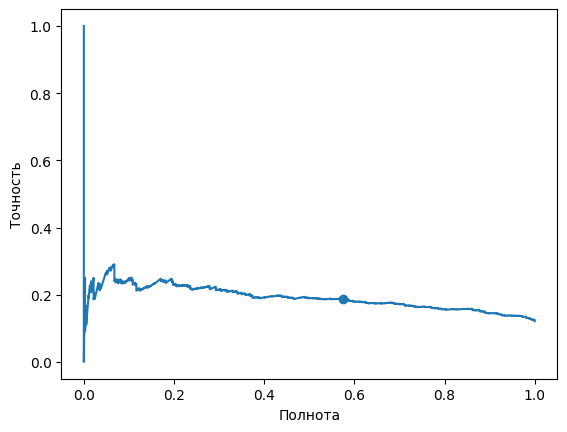

Порог, дающий максимальное значение F1-меры: 0.5284705081799884
Максимальное значение F1-меры: 0.2836120401337793


In [74]:
# для нахождения лучшего порога будем использовать следующий код:

from sklearn.metrics import precision_recall_curve, f1_score

precision, recall, thresholds = precision_recall_curve(ytest, probs_test[:, 1])
f1_scores = 2 * precision * recall / (precision + recall)
max_index = np.nanargmax(f1_scores)
best_threshold = thresholds[max_index]
plt.plot(recall, precision, label='Кривая точности-полноты')
plt.scatter(recall[max_index], precision[max_index], label=f'Максимальное значение F1-меры: {f1_scores[max_index]:.2f}')
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.show()
print(f'Порог, дающий максимальное значение F1-меры: {best_threshold}')
print(f'Максимальное значение F1-меры: {f1_scores[max_index]}')

In [79]:
model.coef_, model.intercept_

(array([[-2.02937783e-01,  3.28012718e-02, -5.93730999e-02,
          8.24249176e-02,  1.26073811e-01,  1.27870727e-02,
          1.85318451e-01, -7.73814391e-02, -2.63213635e-02,
          1.60815899e-02,  2.74287004e-01, -4.34985886e-01,
         -1.83582969e-02,  1.93737067e-01, -2.58899341e-02,
         -3.06682613e-02, -1.63106042e-03, -4.87152794e+01,
          1.56192137e-01]]),
 array([-0.53074238]))

In [80]:
# сохраняем пиклы
import joblib

joblib.dump(model, 'model.pickle')
joblib.dump(scaler, 'scaler.pickle')
joblib.dump(ordinal_encoder, 'encoder.pickle')
final_data.to_csv('training_data.csv', index=False)

In [81]:
# на всякий случай сохраним данные, на которых проходимо обучение
final_data.to_csv('training_data.csv', index=False)